In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from os.path import isdir, join, isfile

In [4]:
import datetime
import pandas as pd
import seaborn as sns

In [56]:
dir_list = ["../data/tests_performance/N128_OMP16_32nodes_file_v10_1exec", 
            "../data/tests_performance/N128_OMP16_32nodes_file_v10",
            "../data/tests_performance/N128_OMP16_32nodes_file_v11", 
            "../data/tests_performance/N128_OMP16_32nodes_file_v12",
            "../data/tests_performance/N128_OMP16_32nodes_2node_v10_fast_sleep01",
            "../data/tests_performance/N128_OMP16_32nodes_2node_v11_fast_sleep01",
            "../data/tests_performance/N128_OMP16_32nodes_2node_v12_fast_sleep01",
            "../data/tests_performance/N128_OMP16_32nodes_3node_v10",
            "../data/tests_performance/N128_OMP16_32nodes_3node_v11",
            "../data/tests_performance/N128_OMP16_32nodes_3node_v12"]

dir_list = ["../data/tests_performance/N128_OMP16_32nodes_file_v10",
            "../data/tests_performance/N128_OMP16_32nodes_2node_v10_fast_sleep01",
            "../data/tests_performance/N128_OMP16_32nodes_3node_v10"]
            
logfile_list = []
for d in dir_list:
    print(d)
    logfile_list.append(join(d, "delta.log"))
    assert(isfile(logfile_list[-1]))
    assert(isdir(d))

../data/tests_performance/N128_OMP16_32nodes_file_v10
../data/tests_performance/N128_OMP16_32nodes_2node_v10_fast_sleep01
../data/tests_performance/N128_OMP16_32nodes_3node_v10


In [57]:
columns = ["time_log", "tidx", "time_fft", "runnr"]
dframe = pd.DataFrame(columns=columns)

In [58]:
for run, logfile in enumerate(logfile_list):
    runnr = f"run{run:1d}"
    with open(logfile, "r") as df:
        l0 = df.readline()
        splits = l0.split()
        # There is a , that needs to be removed
        fix_mus = splits[2].replace(",", ".", 1)
        fix_mus = fix_mus.replace(",", "")
        toff_run = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

        print(f"run: {run}, toff_run = {toff_run}")        
        
        for line in df:
            if "FFT took" in line:
                splits = line.split()
                fix_mus = splits[2].replace(",", ".", 1)
                fix_mus = fix_mus.replace(",", "")
                time_log = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
                tidx = int(splits[10][:-1])
                time_fft = float(splits[13][:-1])


                new_row = {"time_log": time_log - toff_run, "tidx":int(splits[10][:-1]), 
                           "time_fft": datetime.timedelta(seconds=float(splits[13][:-1])),
                           "runnr": runnr}
                dframe = dframe.append(new_row, ignore_index=True)

run: 0, toff_run = 2020-05-28 07:52:09.625625
run: 1, toff_run = 2020-05-28 11:00:48.392392
run: 2, toff_run = 2020-05-28 12:05:45.432432


Text(0, 0.5, 'time index')

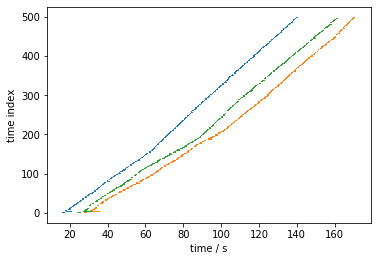

In [61]:
fig = plt.figure()
ax = fig.add_axes([0.2, 0.2, 0.75, 0.75])


for index, row in dframe.iterrows():
    toff = row.time_log.seconds + row.time_log.microseconds * 1e-6
    tdelta = row.time_fft.seconds + row.time_fft.microseconds * 1e-6

    fc = "C" + row["runnr"][-1]
    ax.broken_barh([(toff, tdelta)], (row.tidx, 1), facecolors=fc)
    
ax.set_xlabel("time / s")
ax.set_ylabel("time index")
    
#fig.savefig("time_fft.png", dpi=300)

In [62]:
dframe["time_fft_secs"] = dframe["time_fft"].apply(lambda x: x.seconds + x.microseconds * 1e-6)

(0.0, 10.0)

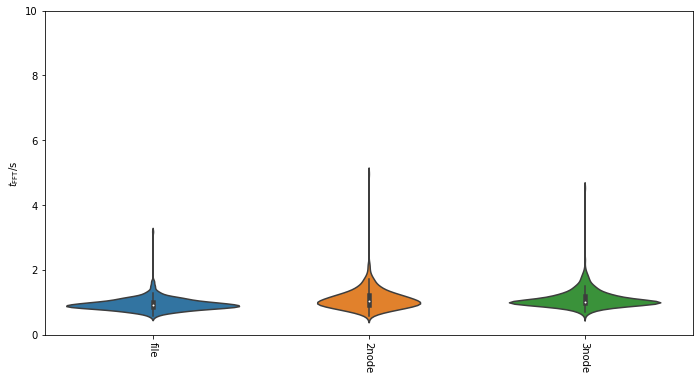

In [64]:
fig2 = plt.figure(figsize=(12, 6))
ax2 = fig2.add_axes([0.2, 0.2, 0.75, 0.75])

ax = sns.violinplot(x="runnr", y="time_fft_secs", data=dframe, ax=ax2)
ax.set(ylabel=r"$t_{\mathrm{FFT}} / \mathrm{s}$", xlabel="")
ax.set_xticklabels(["file", "2node", "3node"],
                   rotation=270)


ax.set_ylim((0.0, 10.0))